In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [27]:
# Cargar el dataset
file_path = 'Titanic-Dataset.csv'  
titanic_data = pd.read_csv(file_path)


In [29]:
# Preprocesamiento de los datos
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Completar edad con la mediana
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)  # Completar puerto con el modo
titanic_data['Cabin'].fillna("Unknown", inplace=True)  # Llenar Cabina con "Desconocido"


C:\Users\felix\AppData\Local\Temp\ipykernel_18228\2577828424.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)  # Completar edad con la mediana
C:\Users\felix\AppData\Local\Temp\ipykernel_18228\2577828424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which w

In [31]:
# Codificar variables categóricas
titanic_data['Sex'] = titanic_data['Sex'].map({'male': 0, 'female': 1})  # 0: hombre, 1: mujer
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})  # C: 0, Q: 1, S: 2


In [33]:
# Eliminar columnas irrelevantes
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
titanic_data_cleaned = titanic_data.drop(columns=columns_to_drop)


In [35]:
# Confirmar la limpieza de los datos
print("Datos preprocesados:")
print(titanic_data_cleaned.info())


Datos preprocesados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB
None


In [37]:
# Separar características (X) y etiquetas (y)
X = titanic_data_cleaned.drop("Survived", axis=1)
y = titanic_data_cleaned["Survived"]


In [39]:
# Visualizar las primeras filas de X y y
print("Primeras filas de X:")
print(X.head())
print("Primeras filas de y:")
print(y.head())

Primeras filas de X:
   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  22.0      1      0   7.2500         2
1       1    1  38.0      1      0  71.2833         0
2       3    1  26.0      0      0   7.9250         2
3       1    1  35.0      1      0  53.1000         2
4       3    0  35.0      0      0   8.0500         2
Primeras filas de y:
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [41]:
# Modelo basado en árboles para calcular la importancia de las características
model = ExtraTreesClassifier(random_state=42)
model.fit(X, y)

ExtraTreesClassifier(random_state=42)

In [43]:
# Importancia de características
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)


C:\Users\felix\AppData\Local\Temp\ipykernel_18228\3369330597.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")


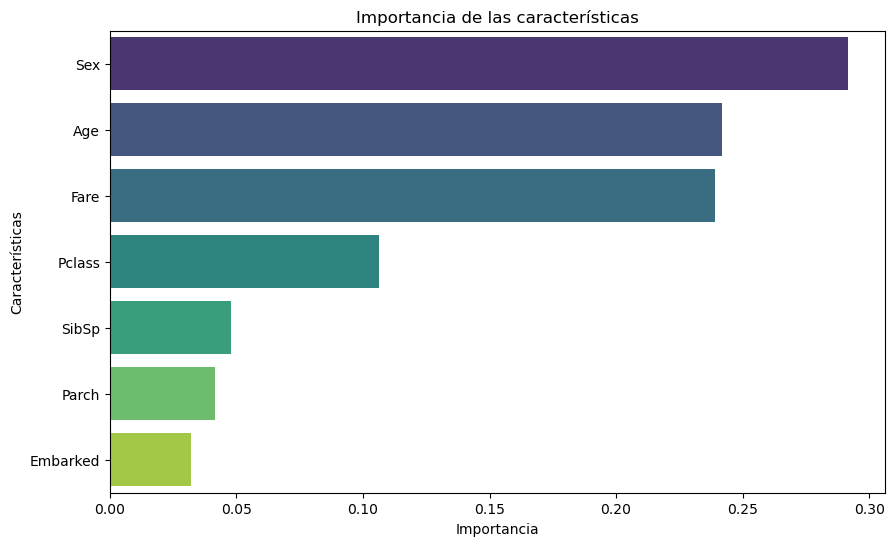

In [45]:
# Visualizar importancia
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="viridis")
plt.title("Importancia de las características")
plt.xlabel("Importancia")
plt.ylabel("Características")
plt.show()

In [47]:
# Dividir datos en conjuntos de entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Forma de X_train:", X_train.shape)
print("Forma de X_test:", X_test.shape)

Forma de X_train: (712, 7)
Forma de X_test: (179, 7)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

In [51]:
# Crear y entrenar el modelo de Regresión Logística
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)


LogisticRegression(max_iter=1000, random_state=42)

In [53]:
# Predicciones en el conjunto de prueba
y_pred = logreg.predict(X_test)


In [55]:
# Evaluación del modelo
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



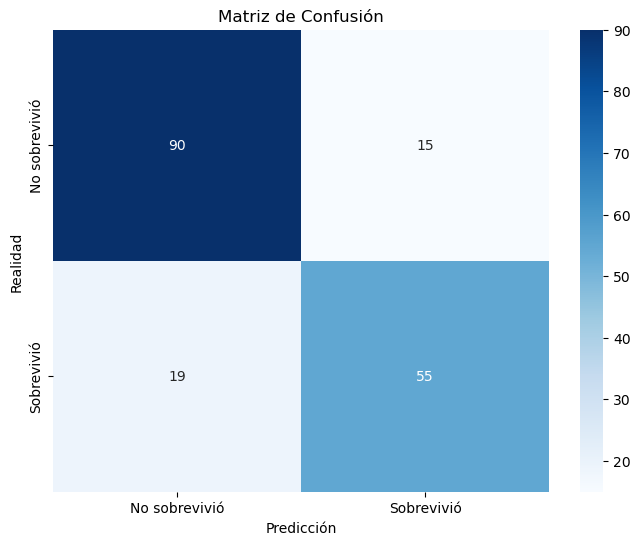

In [57]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["No sobrevivió", "Sobrevivió"], yticklabels=["No sobrevivió", "Sobrevivió"])
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Realidad")
plt.show()

In [59]:
# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")

Precisión del modelo: 0.81
